In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('placement.csv')

In [4]:
df.shape

(1000, 3)

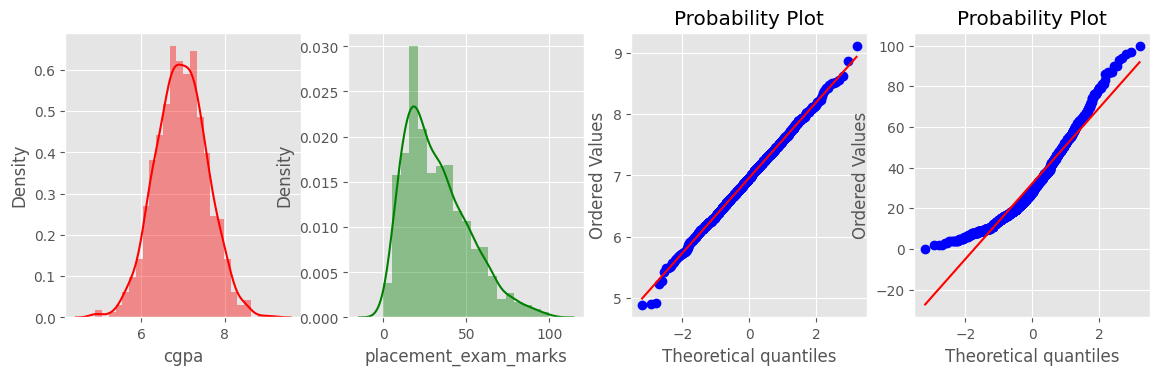

In [5]:
plt.style.use('ggplot')
fig , (ax1,ax2,ax3,ax4)= plt.subplots(ncols=4,figsize=(14,3.7))

sns.distplot(df['cgpa'],color='red',ax=ax1)
sns.distplot(df['placement_exam_marks'],ax=ax2,color='green')

stats.probplot(df['cgpa'],plot=ax3)
stats.probplot(df['placement_exam_marks'],plot=ax4)
plt.show()

In [6]:
print("cgpa mean",df['cgpa'].mean())
print("cgpa min",df['cgpa'].min())
print("cgpa max",df['cgpa'].max())
print("cgpa var",df['cgpa'].var())

cgpa mean 6.96124
cgpa min 4.89
cgpa max 9.12
cgpa var 0.37933019259259226


#### first method

In [18]:
upper =df['cgpa'].mean()+ 3*df['cgpa'].std() 
lower =df['cgpa'].mean()- 3*df['cgpa'].std() 

In [23]:
upper,lower

(np.float64(8.808933625397168), np.float64(5.113546374602832))

In [19]:

#! find the outlier

df[(df['cgpa']> 8.808933625397168) | (df['cgpa']<5.1122)]

,cgpa,placement_exam_marks,placed,z-score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


#### now remove this

In [20]:
new_df= df[(df['cgpa']<8.8090) & (df['cgpa']>5.11)]

In [21]:
new_df.shape

(995, 4)

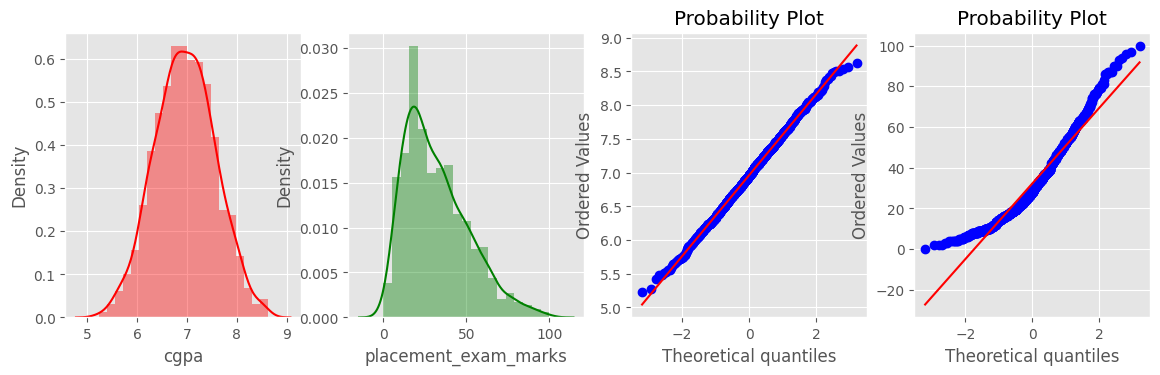

In [22]:
plt.style.use('ggplot')
fig , (ax1,ax2,ax3,ax4)= plt.subplots(ncols=4,figsize=(14,3.7))

sns.distplot(new_df['cgpa'],color='red',ax=ax1)
sns.distplot(new_df['placement_exam_marks'],ax=ax2,color='green')

stats.probplot(new_df['cgpa'],plot=ax3)
stats.probplot(new_df['placement_exam_marks'],plot=ax4)
plt.show()

#### z score

In [12]:
df['z-score']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [13]:
df

,cgpa,placement_exam_marks,placed,z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [14]:
df[(df['z-score']>3) | (df['z-score']<-3)]

,cgpa,placement_exam_marks,placed,z-score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [15]:
new_d =df[(df['z-score']<3) & (df['z-score']>-3)]

In [16]:
new_d.shape

(995, 4)

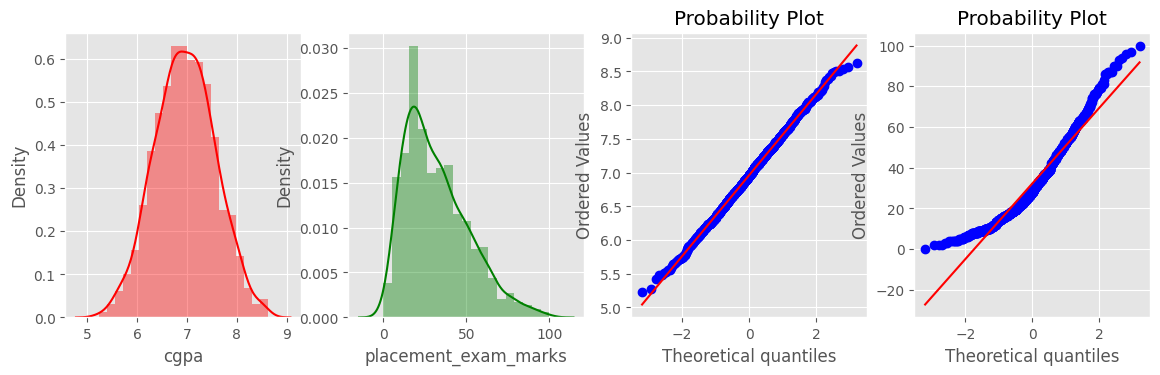

In [17]:
plt.style.use('ggplot')
fig , (ax1,ax2,ax3,ax4)= plt.subplots(ncols=4,figsize=(14,3.7))

sns.distplot(new_d['cgpa'],color='red',ax=ax1)
sns.distplot(new_d['placement_exam_marks'],ax=ax2,color='green')

stats.probplot(new_d['cgpa'],plot=ax3)
stats.probplot(new_d['placement_exam_marks'],plot=ax4)
plt.show()

## capping

In [24]:
df['cgpa']= np.where(


    df['cgpa']>upper,

    upper,
    np.where(

        df['cgpa']<lower,
        lower,
        df['cgpa']
    )



)

In [25]:
df

,cgpa,placement_exam_marks,placed,z-score
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239
